#### 연령별 인구 현황 데이터 셋
    - https://jumin.mois.go.kr/ageStatMonth.do#none
    - 남녀구분, 5세단위, 100세이상

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
# warnings : 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생
import warnings
warnings.simplefilter("ignore")


### 남, 여 데이터프레임 생성

In [8]:
# 원본 데이터에서 남자데이터 가져오기
df_men =pd.read_excel("./data/202306_202306_연령별인구현황_월간.xlsx",skiprows=3,usecols="B,E:Y",index_col="행정기관")

df_men.head()

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"706,625","1,052,112","1,205,210","1,202,795","1,490,016","1,805,935","1,767,267","1,654,974","2,060,002","2,003,993",...,"2,049,129","2,122,654","1,591,968","1,051,593","730,834","517,546","220,922","56,592","9,135","1,520"
서울특별시,"113,314","157,840","184,094","195,604","267,118","388,073","386,717","326,992","364,597","344,645",...,"336,153","344,878","275,917","189,812","139,076","96,104","38,116","9,813","1,745",330
부산광역시,"39,970","62,965","68,934","66,965","91,216","107,505","105,069","97,652","127,323","119,958",...,"125,435","143,107","121,110","84,688","57,025","38,158","14,067","3,206",449,77
대구광역시,"30,306","48,282","54,754","56,380","72,104","79,639","77,424","70,646","87,804","89,540",...,"96,705","98,071","71,887","50,586","32,063","23,740","9,840","2,344",317,33
인천광역시,"42,977","62,230","70,588","69,101","84,482","107,400","110,460","101,927","127,298","119,359",...,"120,962","126,495","87,581","53,095","36,393","23,446","9,811","2,541",459,106


In [9]:
# 원본 데이터에서 남자데이터 가져오기
df_women =pd.read_excel("./data/202306_202306_연령별인구현황_월간.xlsx"
                        ,skiprows=3,usecols="B,AB:AV",index_col="행정기관")

df_women.head()

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"671,918","1,001,255","1,140,109","1,127,886","1,372,894","1,633,056","1,600,066","1,566,245","1,988,569","1,945,511",...,"2,022,964","2,153,887","1,685,373","1,190,669","921,394","810,091","473,297","182,805","41,327","7,516"
서울특별시,"106,557","150,890","174,431","188,477","301,831","419,021","385,079","328,070","370,355","353,854",...,"351,170","375,865","315,840","223,402","173,640","129,786","68,429","25,956","6,355","1,165"
부산광역시,"38,152","59,540","65,418","63,454","86,644","101,193","97,347","93,724","124,332","118,194",...,"134,729","159,856","136,522","100,859","71,847","57,545","29,455","10,624","2,495",384
대구광역시,"28,643","46,337","51,651","52,185","64,330","71,139","66,244","64,345","89,686","91,921",...,"101,698","105,719","80,615","61,954","43,742","38,092","20,785","7,358","1,507",230
인천광역시,"40,822","59,153","66,841","65,463","78,447","98,779","100,145","95,325","119,611","114,106",...,"123,451","127,057","92,147","58,296","45,101","37,338","21,837","9,173","2,155",413


## 데이터 탐색

In [10]:
# 전체 컬렁명, 데이터 타입 확인

df_men.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   0~4세     18 non-null     object
 1   5~9세     18 non-null     object
 2   10~14세   18 non-null     object
 3   15~19세   18 non-null     object
 4   20~24세   18 non-null     object
 5   25~29세   18 non-null     object
 6   30~34세   18 non-null     object
 7   35~39세   18 non-null     object
 8   40~44세   18 non-null     object
 9   45~49세   18 non-null     object
 10  50~54세   18 non-null     object
 11  55~59세   18 non-null     object
 12  60~64세   18 non-null     object
 13  65~69세   18 non-null     object
 14  70~74세   18 non-null     object
 15  75~79세   18 non-null     object
 16  80~84세   18 non-null     object
 17  85~89세   18 non-null     object
 18  90~94세   18 non-null     object
 19  95~99세   18 non-null     object
 20  100세 이상  18 non-null     object
dtypes: object(21)
memory usage: 3.1+ KB


##### 데이터 전처리
    - 수치 데이터 object => int64 변경( df.astype(),pd.to_numeric())

In [22]:
import numpy as np
df =pd.DataFrame(
    {
        "name":["hong","sung","jung"],
        "age":["200",np.nan,"600"],
    }
)
df

,name,age
0,hong,200
1,sung,NaN
2,jung,600


In [23]:
df.dtypes


name    object
age     object
dtype: object

In [ ]:
# astype() : 숫자에 , 가 없어야 함
df["age1"] = df["age"].astype("int64")

In [ ]:
# , 제거 후 astype()
# replace(",","")

In [26]:
df_men["0~4세"].str.replace(",","").astype("int64")

행정기관
전국           706625
서울특별시        113314
부산광역시         39970
대구광역시         30306
인천광역시         42977
광주광역시         20688
대전광역시         20908
울산광역시         16069
세종특별자치시        9210
경기도          212321
강원특별자치도       20262
충청북도          22050
충청남도          30179
전라북도          20479
전라남도          22871
경상북도          32271
경상남도          42184
제주특별자치도       10566
Name: 0~4세, dtype: int64

In [ ]:
# 모든 컬럼에 , 를 제거하고 데이터 타입 변경해야 함 => 함수작성
df_men=df_men.apply(lambda x:x.str.replace(",","").astype("int64"))
df_women=df_men.apply(lambda x:x.str.replace(",","").astype("int64"))

- 남자, 여자 컬럼명 통일

In [28]:
df_men.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [29]:
df_women.columns

Index(['0~4세.1', '5~9세.1', '10~14세.1', '15~19세.1', '20~24세.1', '25~29세.1',
       '30~34세.1', '35~39세.1', '40~44세.1', '45~49세.1', '50~54세.1', '55~59세.1',
       '60~64세.1', '65~69세.1', '70~74세.1', '75~79세.1', '80~84세.1', '85~89세.1',
       '90~94세.1', '95~99세.1', '100세 이상.1'],
      dtype='object')

In [30]:
df_women.columns=df_men.columns

In [ ]:
plt.figure(figsize=(10,7))
plt.barh()


plt.show()

In [32]:
df_men.iloc[0]

0~4세        706625
5~9세       1052112
10~14세     1205210
15~19세     1202795
20~24세     1490016
25~29세     1805935
30~34세     1767267
35~39세     1654974
40~44세     2060002
45~49세     2003993
50~54세     2306422
55~59세     2049129
60~64세     2122654
65~69세     1591968
70~74세     1051593
75~79세      730834
80~84세      517546
85~89세      220922
90~94세       56592
95~99세        9135
100세 이상       1520
Name: 전국  , dtype: int64

TypeError: unsupported operand type(s) for //: 'str' and 'int'

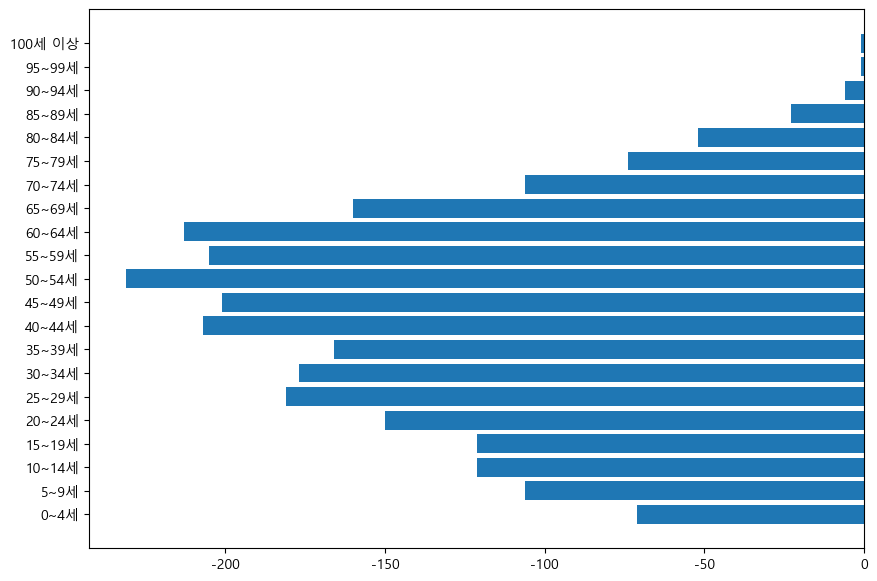

In [36]:
plt.figure(figsize=(10,7))
plt.barh(y=df_men.columns,width=-df_men.iloc[0] // 10000)
plt.barh(y=df_women.columns,width=df_women.iloc[0] // 10000)
plt.title("2023 6월 기준 대한민국 인구 피라미드")
plt.savefig("202306_인구피라미드.png")
plt.show()